In [ ]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [7]:
# import csv file
df = pd.read_csv('/content/WalmartSalesData.csv')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df.shape

(1000, 17)

In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [13]:
#check for null values
pd.isnull(df).sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [14]:
# drop null values
df.dropna(inplace=True)

In [23]:
# change data type
df['Unit price'] = df['Unit price'].astype('int')
df['Quantity'] = df['Quantity'].astype('int')
df['Total'] = df['Total'].astype('int')
df['cogs'] = df['cogs'].astype('int')

In [18]:
df['Total'].dtypes

dtype('int64')

In [19]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [20]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.163000,5.510000,15.379369,322.469000,307.58738,4.761905,15.379369,6.97270
std,26.481082,2.923431,11.708825,245.881701,234.17651,0.000000,11.708825,1.71858
min,10.000000,1.000000,0.508500,10.000000,10.17000,4.761905,0.508500,4.00000
25%,32.000000,3.000000,5.924875,124.250000,118.49750,4.761905,5.924875,5.50000
50%,55.000000,5.000000,12.088000,253.500000,241.76000,4.761905,12.088000,7.00000
75%,77.000000,8.000000,22.445250,471.250000,448.90500,4.761905,22.445250,8.50000
max,99.000000,10.000000,49.650000,1042.000000,993.00000,4.761905,49.650000,10.00000


In [24]:
# use describe() for specific columns
df[['cogs', 'Unit price', 'Total']].describe()

,cogs,Unit price,Total
count,1000.000000,1000.000000,1000.000000
mean,307.092000,55.163000,322.469000
std,234.185449,26.481082,245.881701
min,10.000000,10.000000,10.000000
25%,118.250000,32.000000,124.250000
50%,241.000000,55.000000,253.500000
75%,448.250000,77.000000,471.250000
max,993.000000,99.000000,1042.000000


# Exploratory Data Analysis

### Gender

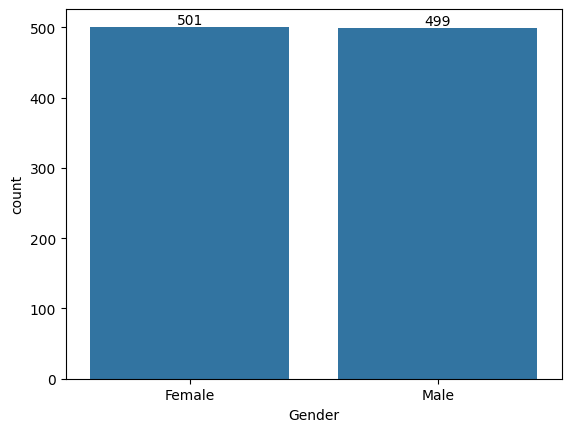

In [25]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Total'>

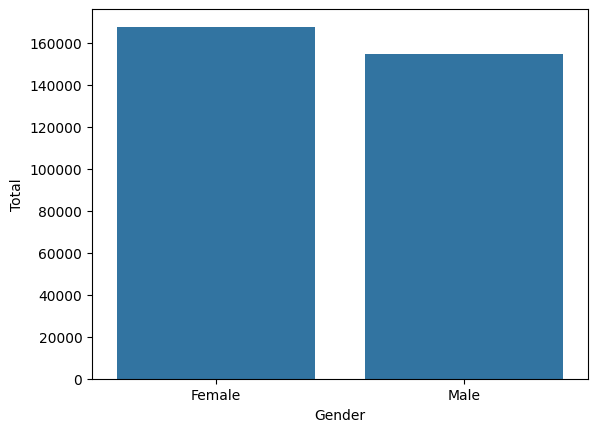

In [26]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False)

sns.barplot(x = 'Gender',y= 'Total' ,data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females is slightly greater than men*

### State

<Axes: xlabel='City', ylabel='Quantity'>

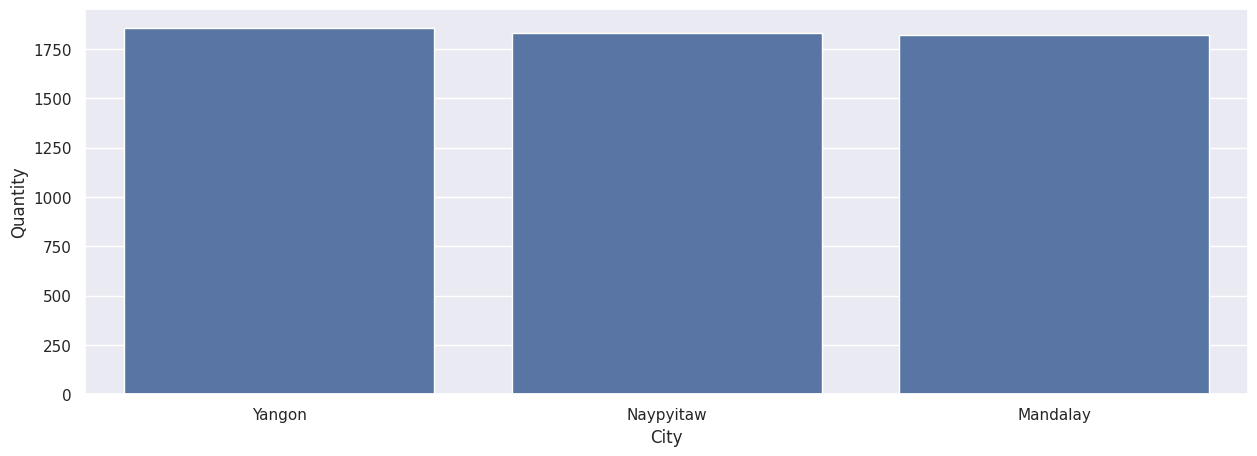

In [28]:
# total number of orders from top 10 states

sales_state = df.groupby(['City'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'City',y= 'Quantity')

<Axes: xlabel='City', ylabel='Total'>

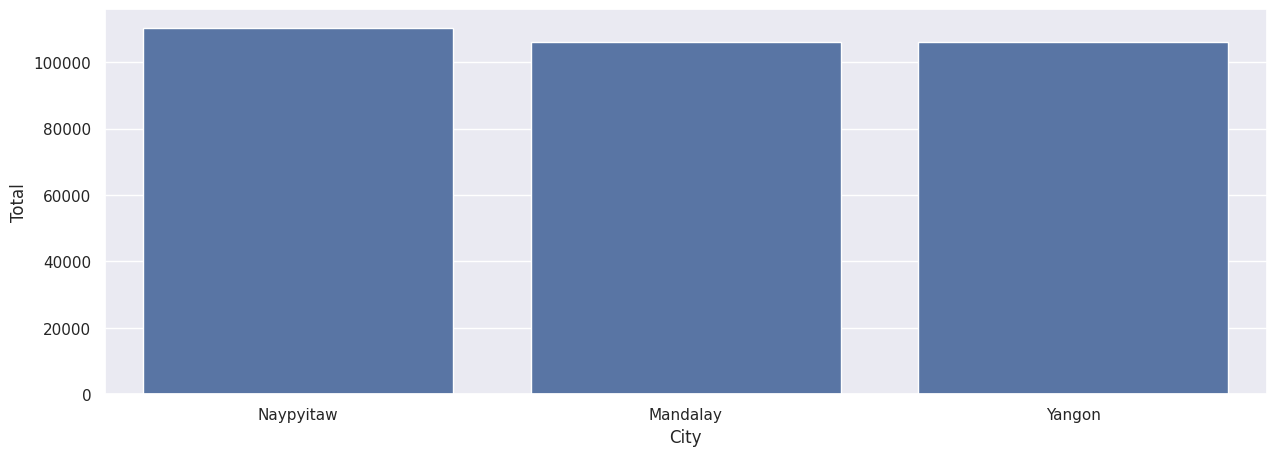

In [29]:
# total amount/sales from top 10 states

sales_state = df.groupby(['City'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'City',y= 'Total')



```
# This is formatted as code
```

### Payment Method

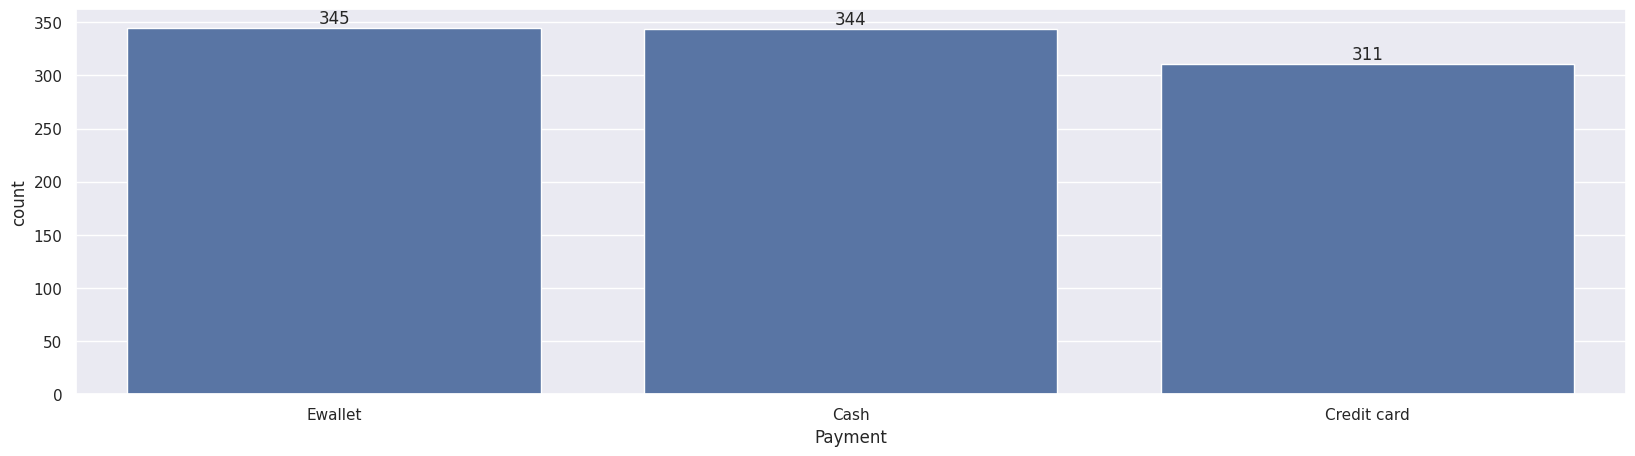

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Payment')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Payment', ylabel='Total'>

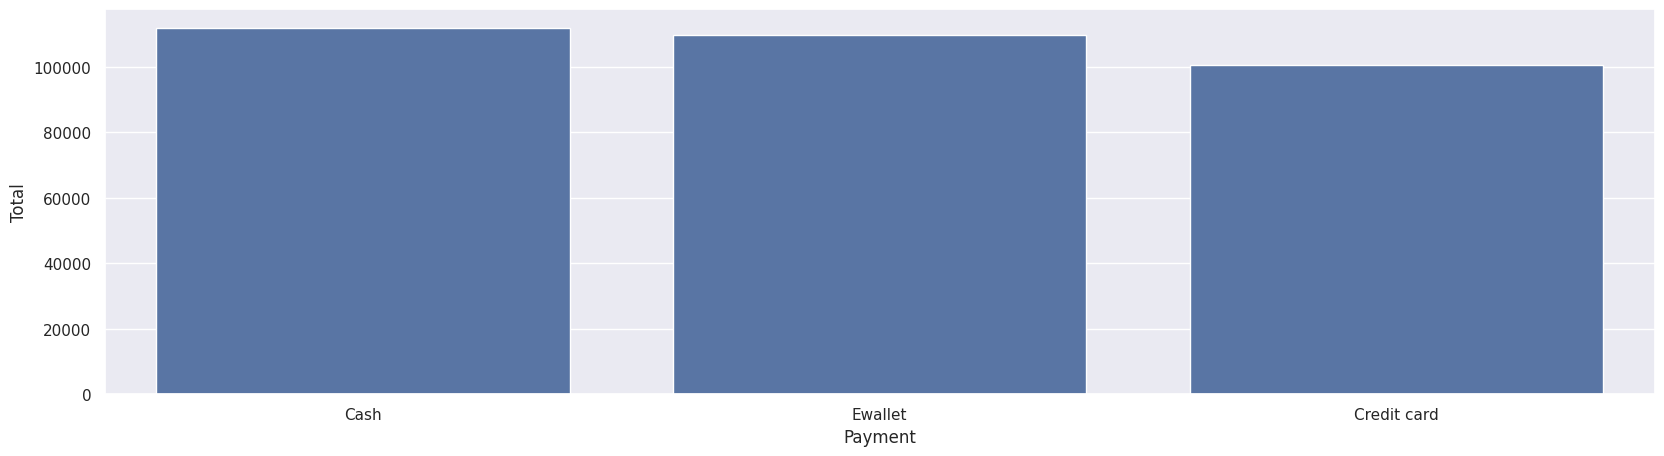

In [31]:
sales_state = df.groupby(['Payment'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Payment',y= 'Total')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

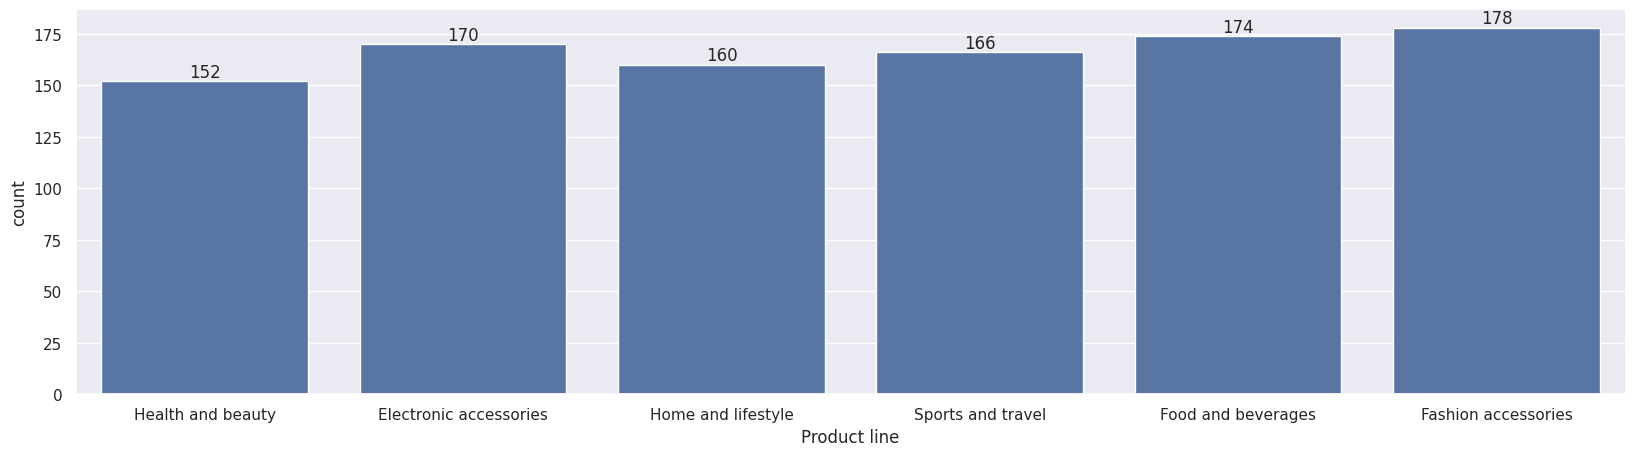

In [32]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product line')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product line', ylabel='Total'>

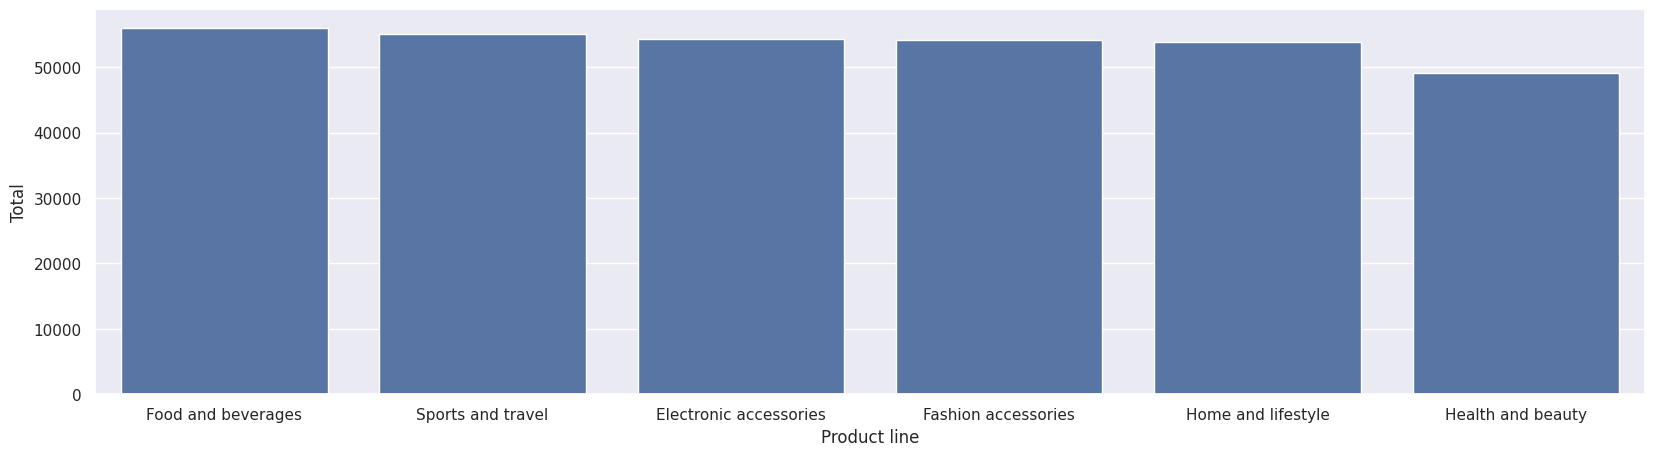

In [33]:
sales_state = df.groupby(['Product line'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product line',y= 'Total')